### D_6. Logistic classification (upsampling)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/re_smote/up_X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/re_smote/up_y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/re_smote/up_X_test.csv')
y_test = pd.read_csv('../data/x_y_data/re_smote/up_y_test.csv')

In [3]:
X_train.shape

(8260, 41)

### Variable Importance 

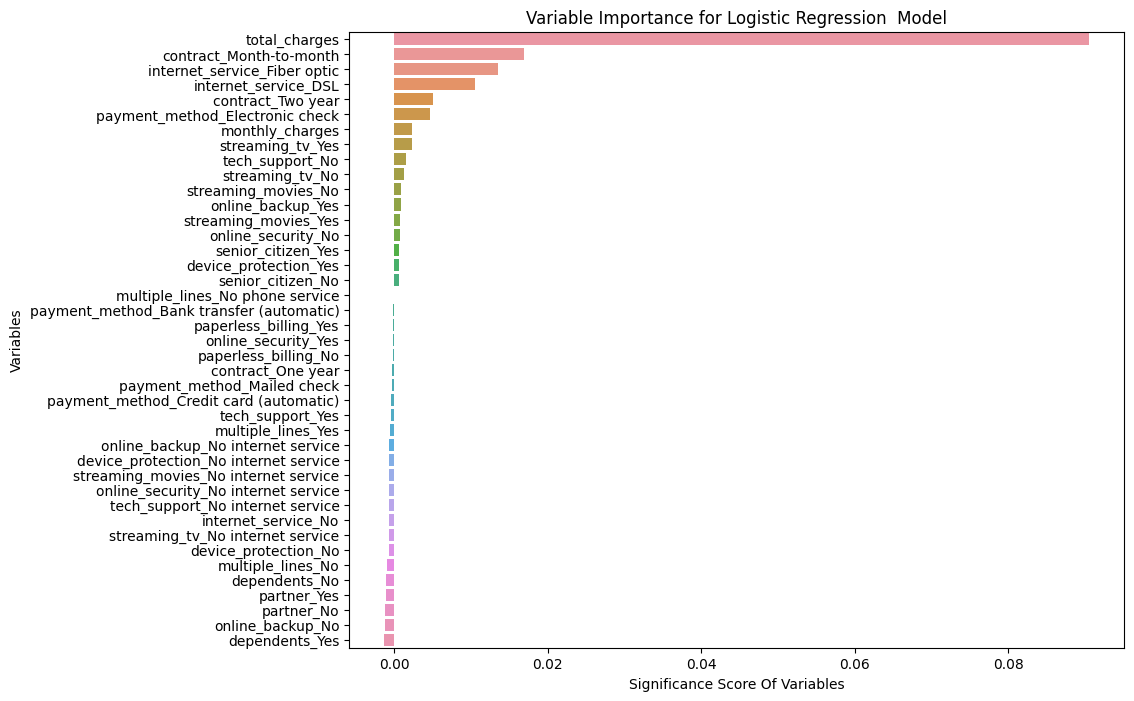

In [4]:
lg1= LogisticRegression(penalty = 'l2')

lg_tuned = lg1.fit(X_train, y_train)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(lg_tuned, X_train, y_train, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8)) 
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Logistic Regression  Model")
plt.show()


In [5]:
#save the model
lg1.fit(X_train, y_train)

filename = "../models/re_up_smote_lg.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(lg1,file)

In [6]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df.head()

,0
total_charges,0.090484
contract_Month-to-month,0.016828
internet_service_Fiber optic,0.013450
internet_service_DSL,0.010436
contract_Two year,0.005073


In [7]:
feature_importances_df

,0
total_charges,0.090484
contract_Month-to-month,0.016828
internet_service_Fiber optic,0.013450
internet_service_DSL,0.010436
contract_Two year,0.005073
payment_method_Electronic check,0.004600
monthly_charges,0.002312
streaming_tv_Yes,0.002276
tech_support_No,0.001477
streaming_tv_No,0.001283


In [8]:
feature_importances_df.T.to_csv('../data/Re_Significant_Score/up_re_LG_Significance_Score.csv', index=False)

### the classification report

In [9]:
from sklearn.metrics import confusion_matrix


y_pred = lg1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[747, 286],
       [ 76, 298]])

In [10]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

No     823
Yes    584
Name: count, dtype: int64

In [11]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
No       1033
Yes       374
Name: count, dtype: int64

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = lg1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.742715
1,Precision,0.510274
2,Recall,0.796791
3,F1-Score,0.622129
4,Kappa,0.440952


In [13]:
metrics_df.to_csv('../data/metrics/RE_up_SMOTE_lg_metrics.csv', index=False)